In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [78]:
dataset = pd.read_csv('Dataset/Californiahousing.csv')

In [79]:
dataset.shape

(20640, 10)

In [80]:
dataset.info()

dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [83]:

dataset.isnull().sum()



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [82]:
# Replace the meaning values with the Mean
dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean(), inplace=True)


# Convert the data type from object ot int
dataset['total_bedrooms']=dataset['total_bedrooms'].astype(int)

# Convert the object data type in Ocean Proximity to categoryt

dataset['ocean_proximity'] = dataset['ocean_proximity'].astype('category')

#Check my datatypes agaoin
dataset.dtypes


C:\Users\eengj\AppData\Local\Temp\ipykernel_13820\2983067877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean(), inplace=True)


longitude              float64
latitude               float64
housing_median_age       int64
total_rooms              int64
total_bedrooms           int64
population               int64
households               int64
median_income          float64
ocean_proximity       category
median_house_value       int64
dtype: object

In [84]:
X = dataset.drop(columns=['median_house_value']) 

y = dataset['median_house_value']

# Use one ecnoding technique to convert the category to numerical
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Multiple Linear Regression Model

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

In [86]:
# Ridge Regression (L2 Regularization)

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [87]:
# Lasso Regression (L1 Regularization)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [88]:
#Random Forest

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [89]:
# Decison Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [90]:
# Support Vector Machine
svm = SVR()
svm.fit(X_train, y_train)       
y_pred_svm = svm.predict(X_test)

Evaluate Model Performance


In [91]:

def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")

In [92]:
evaluate_model("Multiple Linear Regression", y_test, y_pred_multi)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Decison Tree", y_test, y_pred_dt)
evaluate_model("Support Vector Machine", y_test, y_pred_svm)

Multiple Linear Regression Performance:
MSE: 4904387231.5426
R-squared: 0.6257

Ridge Regression Performance:
MSE: 4905207676.9030
R-squared: 0.6257

Lasso Regression Performance:
MSE: 4904485023.9005
R-squared: 0.6257

Random Forest Performance:
MSE: 2393744679.2608
R-squared: 0.8173

Decison Tree Performance:
MSE: 4681333011.4748
R-squared: 0.6428

Support Vector Machine Performance:
MSE: 13742510377.0523
R-squared: -0.0487



Checking For Assumptions from Lasso Regression


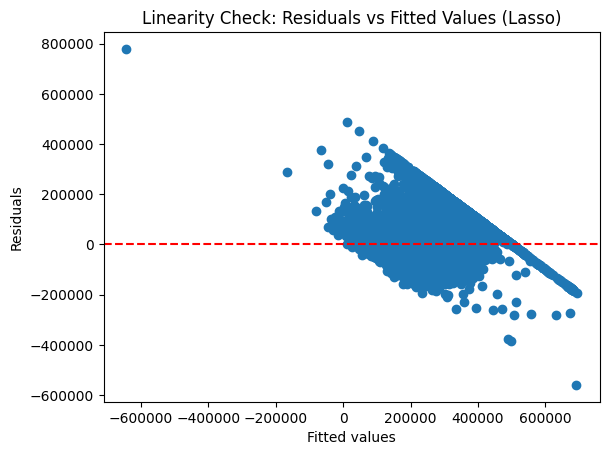

In [93]:
# 1. Linearity Check (Plot Residuals vs Fitted Values)
y_train_pred = lasso.predict(X_train)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs Fitted Values (Lasso)")
plt.show()

In [94]:
# 2. Normality of Residuals (Shapiro-Wilk Test)
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality: p-value = {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test for Normality: p-value = 0.0000


c:\Users\eengj\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16512.
  res = hypotest_fun_out(*samples, **kwds)


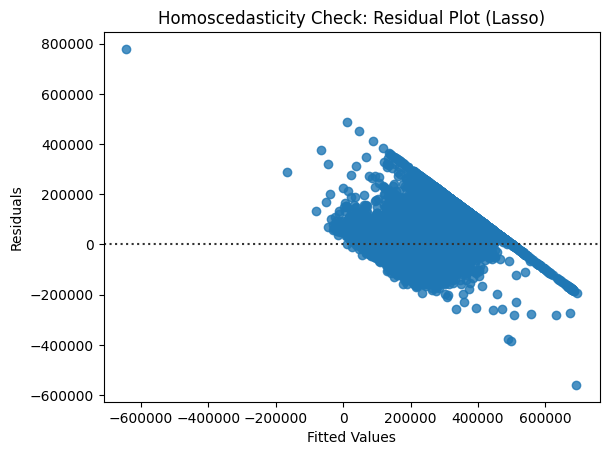

In [66]:
# 4. Homoscedasticity Check (Plot Residuals)
sns.residplot(x=y_train_pred, y=residuals, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residual Plot (Lasso)")
plt.show()
